In [59]:
# instalação dos pacotes necessários

In [ ]:
!pip install spaCy

In [ ]:
!pip install -U spacy-lookups-data

In [ ]:
!python -m spacy download pt_core_news_lg

In [ ]:
!pip install nltk

In [60]:
################################################################################################

# Instituição: IESB
# Disciplina:  Tópicos em Banco de Dados (TPBD)
# Objetivo:    Fornecer conhecimentos e práticas de paradigmas de programação para IA aplicada.
# Professor:   Bruno Miranda [bruno.marcos@iesb.edu.br]
# Data:        Junho2024

# Prática: Text Ming - Dataset fakenwes Brasil (FACTCKBR)

################################################################################################

In [8]:
# imports necessarios ao projeto

import pandas as pd
import spacy
import nltk
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# download e load de pacotes e modelo
nltk.download('punkt')
pln = spacy.load('pt_core_news_lg')

In [41]:
# codificação das funções utilitarias
def remover_acentos(df):
  df = df.str.replace('[ãá]', 'a')
  df = df.str.replace('[éê]', 'e')
  df = df.str.replace('[í]', 'i')
  df = df.str.replace('[ôó]', 'o')
  df = df.str.replace('[ú]', 'u')
  df = df.str.replace('[ç]', 'c')
  return df

def converter_letras_minusculas(df):
  df = df.str.lower()
  return df

def remover_pontuacao(df):
  df = df.str.replace('[^\w\s]', '')
  return df

def remover_numeros(df):
  df = df.apply(lambda x: ''.join([word for word in x.split() if not word.isdigit()]))
  return df

def remover_url(df):
  return df

def remover_tag(df):
  return df

In [42]:
# codificação das funções text mining

# remoção das palavras FREQUENTES do dataset de texto
def remover_palavras_frequentes(df, n_palavras):
  palavras = []
  textos = df.apply(nltk.word_tokenize)

  for texto in textos:
    for palavra in texto:
      palavras.append(palavra)

  freq = [x for x in nltk.FreqDist(palavras)]

  frequentes = freq[0:n_palavras]

  df = df.apply(lambda x: ''.join([word for word in x.split() if word not in (frequentes)]))

  return df

In [43]:
# remoção das palavras VAZIAS do dataset de texto
def remover_palavras_vazias(df):
  stopwords = pln.Defaults.stop_words

  df = df.apply(lambda x: ''.join([word for word in x.split() if word not in (stopwords)]))

  return df;

In [51]:
# efetua o processo de Transformação de Textos (lematização)
def exec_lematizacao(df):
  df = df.apply(lambda x: ''.join([word.lemma_ for word in pln(x)]))

  return df

In [54]:
# efetua o processo de Engenharia de Características de Textos
def exec_bag_of_words(df):
  metodo = CountVectorizer(ngram_range=(1, 1), stop_words=pln.Defaults.stop_words)

  X = metodo.fit_transform(df)
  df = pd.DataFrame(X.toarray(), columns=metodo.get_features_names())

  return df

def exec_tfidf(df):
  metodo = TfidfVectorizer()

  X = metodo.fit_transform(df)
  df = pd.DataFrame(X.toarray(), columns=metodo.get_feature_names_out())

  return df

In [55]:
# executa o modelo de NLP
df = pd.read_csv('FACTCKBR.tsv', sep='\t')
df = df.rename(columns={'title': 'titulo'})

## trata os dados em texto
df['titulo'] = remover_acentos(df['titulo'])
df['titulo'] = converter_letras_minusculas(df['titulo'])
df['titulo'] = remover_pontuacao(df['titulo'])
df['titulo'] = remover_numeros(df['titulo'])
df['titulo'] = remover_palavras_vazias(df['titulo'])
df['titulo'] = exec_lematizacao(df['titulo'])
df['titulo'] = remover_palavras_frequentes(df['titulo'], 20)

#df['titulo'] = exec_bag_of_words(df['titulo'])


In [56]:
# testa o modelo de NLP
dataset_final = exec_tfidf(df['titulo'])

In [57]:
dataset_final

,15milhõesdedesempregado,163foifeitoporbolsonaro,163tenhacomeçadocombolsonaro,2estradaquebolsonaroinaugurounonordeste,2milhõesdevotosnulosnãosignificamquehouvefraudenasurnas,319,4milobrasparadasnobrasil,4nãotemaçãocontraavalepelodesastredemariana,57,5milhãoenterradosnoquintalfoidopsledopt,...,éfalsoqueurnasestãoprogramadasparahoráriodeverão,émentiraquehaddadestuprouumameninadeanos,émontagemcapadarevistacharliehebdosobrecensuradostfàcrusoé,émontagemfotodebolsonarorodeadoporlíderesmundiais,émontagemfotodeerrosortográficosemcartazdemanifestantegovernista,émontagemfotoquemostramariadorosáriocomcamisetadombl,émontagempostemquepaulopimentachamanordestinosdeporcos,éumafrasedejohnlennon,éumamontagemainteraçãodeguaidócombolsonaronotwitter,éumamontagemotweetdehaddadcomelogioanicolásmaduro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
dataset_final['15milhõesdedesempregado'].plot(kind='hist', bins=20, title='15milhõesdedesempregado')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['163foifeitoporbolsonaro'].plot(kind='hist', bins=20, title='163foifeitoporbolsonaro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['163tenhacomeçadocombolsonaro'].plot(kind='hist', bins=20, title='163tenhacomeçadocombolsonaro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['2estradaquebolsonaroinaugurounonordeste'].plot(kind='hist', bins=20, title='2estradaquebolsonaroinaugurounonordeste')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final.plot(kind='scatter', x='15milhõesdedesempregado', y='163foifeitoporbolsonaro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final.plot(kind='scatter', x='163foifeitoporbolsonaro', y='163tenhacomeçadocombolsonaro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final.plot(kind='scatter', x='163tenhacomeçadocombolsonaro', y='2estradaquebolsonaroinaugurounonordeste', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset_final.plot(kind='scatter', x='2estradaquebolsonaroinaugurounonordeste', y='2milhõesdevotosnulosnãosignificamquehouvefraudenasurnas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bolsonaronãofoieleitopersonalidadedoanopelarevistatime']
  ys = series['15milhõesdedesempregado']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset_final.sort_values('bolsonaronãofoieleitopersonalidadedoanopelarevistatime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bolsonaronãofoieleitopersonalidadedoanopelarevistatime')
_ = plt.ylabel('15milhõesdedesempregado')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bolsonaronãofoieleitopersonalidadedoanopelarevistatime']
  ys = series['163foifeitoporbolsonaro']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset_final.sort_values('bolsonaronãofoieleitopersonalidadedoanopelarevistatime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bolsonaronãofoieleitopersonalidadedoanopelarevistatime')
_ = plt.ylabel('163foifeitoporbolsonaro')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bolsonaronãofoieleitopersonalidadedoanopelarevistatime']
  ys = series['163tenhacomeçadocombolsonaro']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset_final.sort_values('bolsonaronãofoieleitopersonalidadedoanopelarevistatime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bolsonaronãofoieleitopersonalidadedoanopelarevistatime')
_ = plt.ylabel('163tenhacomeçadocombolsonaro')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bolsonaronãofoieleitopersonalidadedoanopelarevistatime']
  ys = series['2estradaquebolsonaroinaugurounonordeste']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset_final.sort_values('bolsonaronãofoieleitopersonalidadedoanopelarevistatime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bolsonaronãofoieleitopersonalidadedoanopelarevistatime')
_ = plt.ylabel('2estradaquebolsonaroinaugurounonordeste')

from matplotlib import pyplot as plt
dataset_final['15milhõesdedesempregado'].plot(kind='line', figsize=(8, 4), title='15milhõesdedesempregado')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['163foifeitoporbolsonaro'].plot(kind='line', figsize=(8, 4), title='163foifeitoporbolsonaro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['163tenhacomeçadocombolsonaro'].plot(kind='line', figsize=(8, 4), title='163tenhacomeçadocombolsonaro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset_final['2estradaquebolsonaroinaugurounonordeste'].plot(kind='line', figsize=(8, 4), title='2estradaquebolsonaroinaugurounonordeste')
plt.gca().spines[['top', 'right']].set_visible(False)

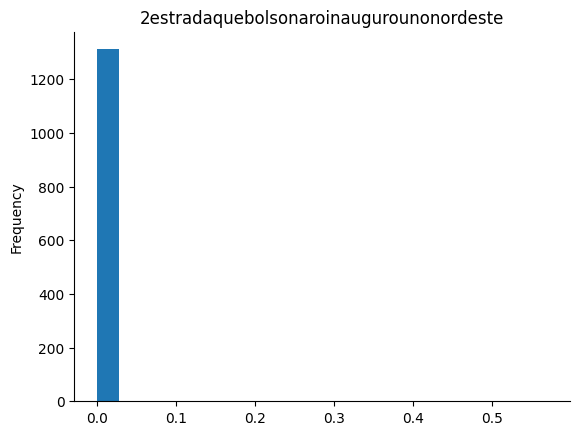

In [58]:
from matplotlib import pyplot as plt
dataset_final['2estradaquebolsonaroinaugurounonordeste'].plot(kind='hist', bins=20, title='2estradaquebolsonaroinaugurounonordeste')
plt.gca().spines[['top', 'right',]].set_visible(False)